 # Feature Exploration
 ## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import librosa
import pandas as pd

# Import custom module containing useful functions
import sonicboom


 ## Load the audio files and combine metadata with the paths

In [2]:
file_data = sonicboom.init_data('./data/UrbanSound8K/')
sonicboom.testblah()

CLASSES = list(file_data['class'].unique())
NUM_CLASSES = len(CLASSES)
FOLDS = list(file_data['fold'].unique())
NUM_FOLDS = len(FOLDS)


Finished 'init_data' in 0.1838 secs
this is a test


 ## Overview of what the data looks like

 ### Show the metadata for the audio files

In [3]:
file_data


,path,slice_file_name,fsID,start,end,salience,fold,classID,class
0,data\UrbanSound8K\audio\fold1\101415-3-0-2.wav,101415-3-0-2.wav,101415,1.000000,5.000000,1,1,3,dog_bark
1,data\UrbanSound8K\audio\fold1\101415-3-0-3.wav,101415-3-0-3.wav,101415,1.500000,5.500000,1,1,3,dog_bark
2,data\UrbanSound8K\audio\fold1\101415-3-0-8.wav,101415-3-0-8.wav,101415,4.000000,8.000000,1,1,3,dog_bark
3,data\UrbanSound8K\audio\fold1\102106-3-0-0.wav,102106-3-0-0.wav,102106,2.243852,3.884477,2,1,3,dog_bark
4,data\UrbanSound8K\audio\fold1\102305-6-0-0.wav,102305-6-0-0.wav,102305,0.000000,2.611610,1,1,6,gun_shot
...,...,...,...,...,...,...,...,...,...
8727,data\UrbanSound8K\audio\fold9\99500-2-0-23.wav,99500-2-0-23.wav,99500,11.500000,15.500000,2,9,2,children_playing
8728,data\UrbanSound8K\audio\fold9\99500-2-0-29.wav,99500-2-0-29.wav,99500,14.500000,18.500000,2,9,2,children_playing
8729,data\UrbanSound8K\audio\fold9\99500-2-0-39.wav,99500-2-0-39.wav,99500,19.500000,23.500000,2,9,2,children_playing
8730,data\UrbanSound8K\audio\fold9\99500-2-0-41.wav,99500-2-0-41.wav,99500,20.500000,24.500000,2,9,2,children_playing


 ### Plot the overall counts of the categories

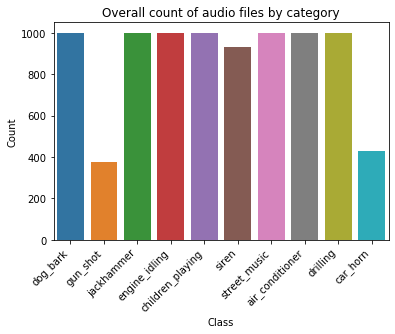

In [4]:
ax = sns.countplot(x='class', data=file_data)
ax.set_title('Overall count of audio files by category')
ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


 ### Plot the counts of the categories by fold

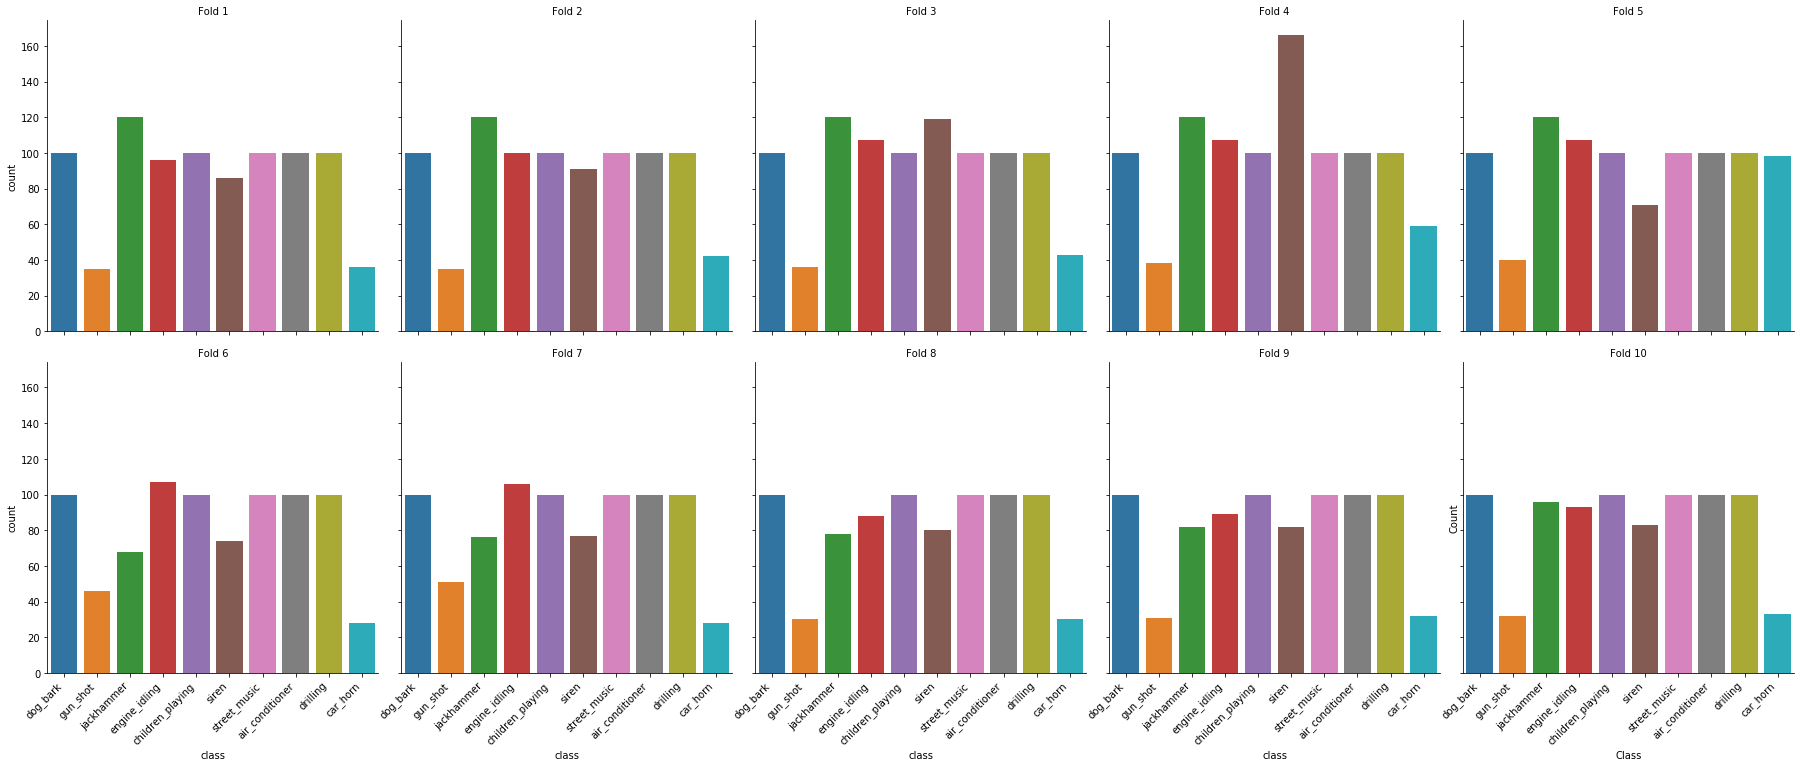

In [5]:
facets = sns.catplot(
    data=file_data,
    col_wrap=5,
    x='class',
    kind='count',
    col='fold'
)
facets.set_xticklabels(rotation=45, horizontalalignment='right')
facets.set_titles('Fold {col_name}')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


 ### Audio Length

In [8]:
filedata_sample = file_data.groupby('class', as_index=False).apply(lambda x: x.sample(2))
audio_file = np.array(np.zeros(len(filedata_sample)))
sampling_rate = np.array(np.zeros(len(filedata_sample)))
def load_audio(filepath):
    data, freq = librosa.load(filepath)
    return data, freq
audio_file, sampling_rate = [load_audio(f) for f in filedata_sample['path']]


ValueError: too many values to unpack (expected 2)